# TITANIC SURVIVAL PREDICTION

We will be using the Titanic Dataset of Kaggle to train our model for the survival prediction ( 'https://www.kaggle.com/datasets/yasserh/titanic-dataset' )

In [1]:
# Importing the Libraries for the work

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Loading the Titanic Dataset into the program

data = pd.read_csv('Titanic-Dataset.csv')

# Data Preprocessing


In [4]:
#Viewing the first five rows of the data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Viewing all the columns

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Shape of the data

data.shape

#There are total of 891 rows and 12 columns

(891, 12)

In [7]:
# Viewing the data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Describing the dataset

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Counting the null values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Removing the columns which are not required

data_dropped = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

data_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# Searching for duplicate values

data_dropped.duplicated().sum()

111

In [12]:
data_dropped['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [13]:
data_dropped['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
# Handling the missing Values of the Embarked and Age column

#we will use the mean of age to fill the Age column missing values

mean_age = data_dropped.Age.mean()

data_dropped.Age.fillna(mean_age, inplace=True)

#we will use the most frequently occured value of Embarked to fill its null values

mode_emb = data_dropped.Embarked.mode()[0]
data_dropped.Embarked.fillna(mode_emb , inplace=True)

data_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
#Again counting for the null values

data_dropped.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
# counting the unique values of sex and Embarked
print("Unique values of sex are:")
data_dropped.Sex.unique()


Unique values of sex are:


array(['male', 'female'], dtype=object)

In [17]:
print("Unique values of Embarked are:")
data_dropped.Embarked.unique()

Unique values of Embarked are:


array(['S', 'C', 'Q'], dtype=object)

In [18]:
# We will use the One Hot Encoding method to convert the string values into Labels of integers
le = LabelEncoder()

data_dropped['Sex'] = le.fit_transform(data_dropped['Sex'])

data_dropped['Embarked'] = le.fit_transform(data_dropped['Embarked'])

In [19]:
data_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [20]:
#  Now our data is cleaned and we will move futher in the data visualisation part

data_clean = data_dropped

data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [21]:
# Checking Null values
data_clean.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
# Checing the shape of cleaned data
data_clean.shape

(891, 8)

In [23]:
# Columns of the cleaned data
data_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Exploratory Data Analysis (EDA)

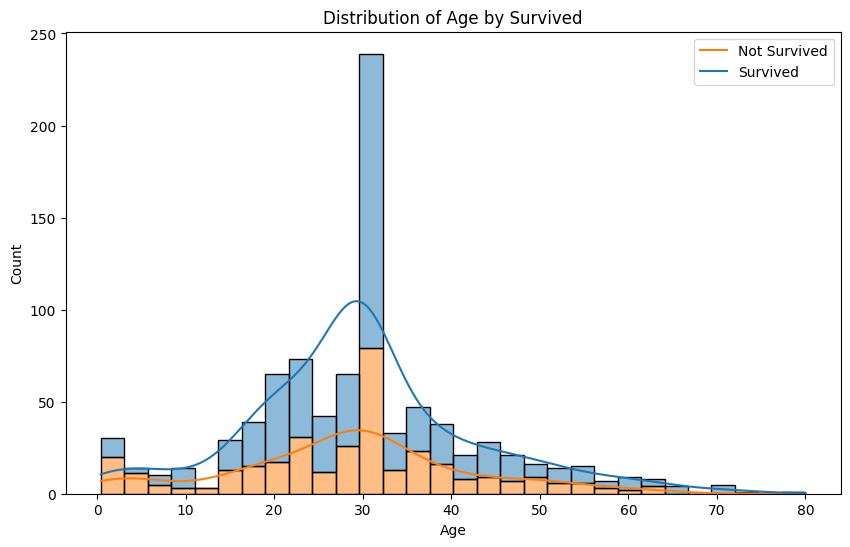

In [24]:
# Explore the distribution of features

plt.figure(figsize=(10, 6))
sns.histplot(data=data_clean, x='Age', bins=30, kde=True, hue='Survived', multiple='stack')
plt.title('Distribution of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

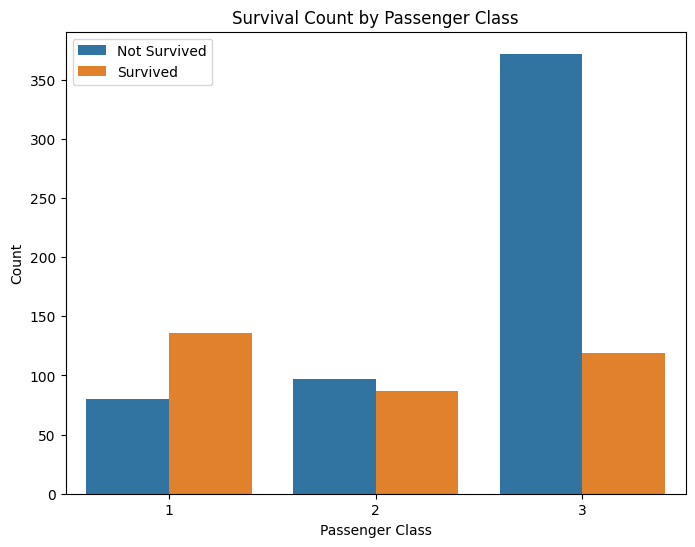

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_clean, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

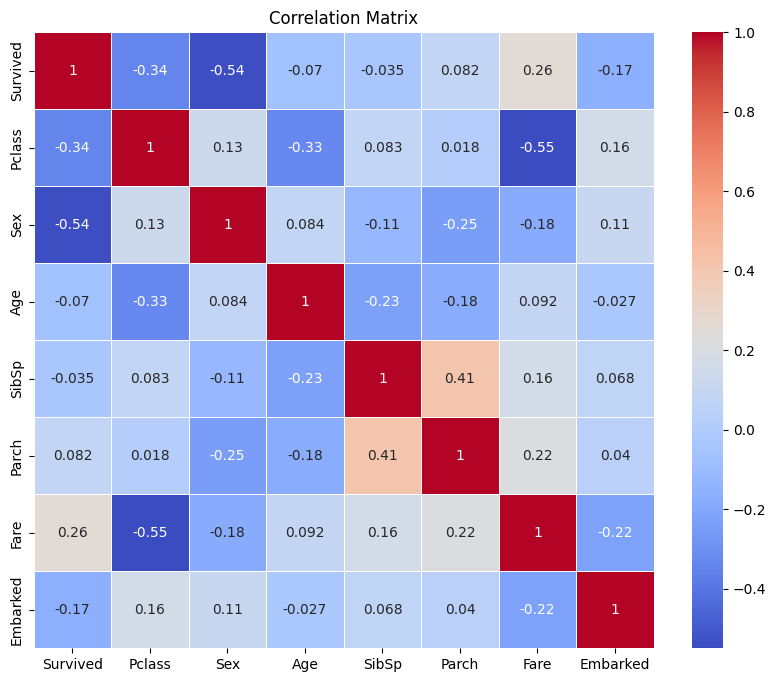

In [26]:
# Explore correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

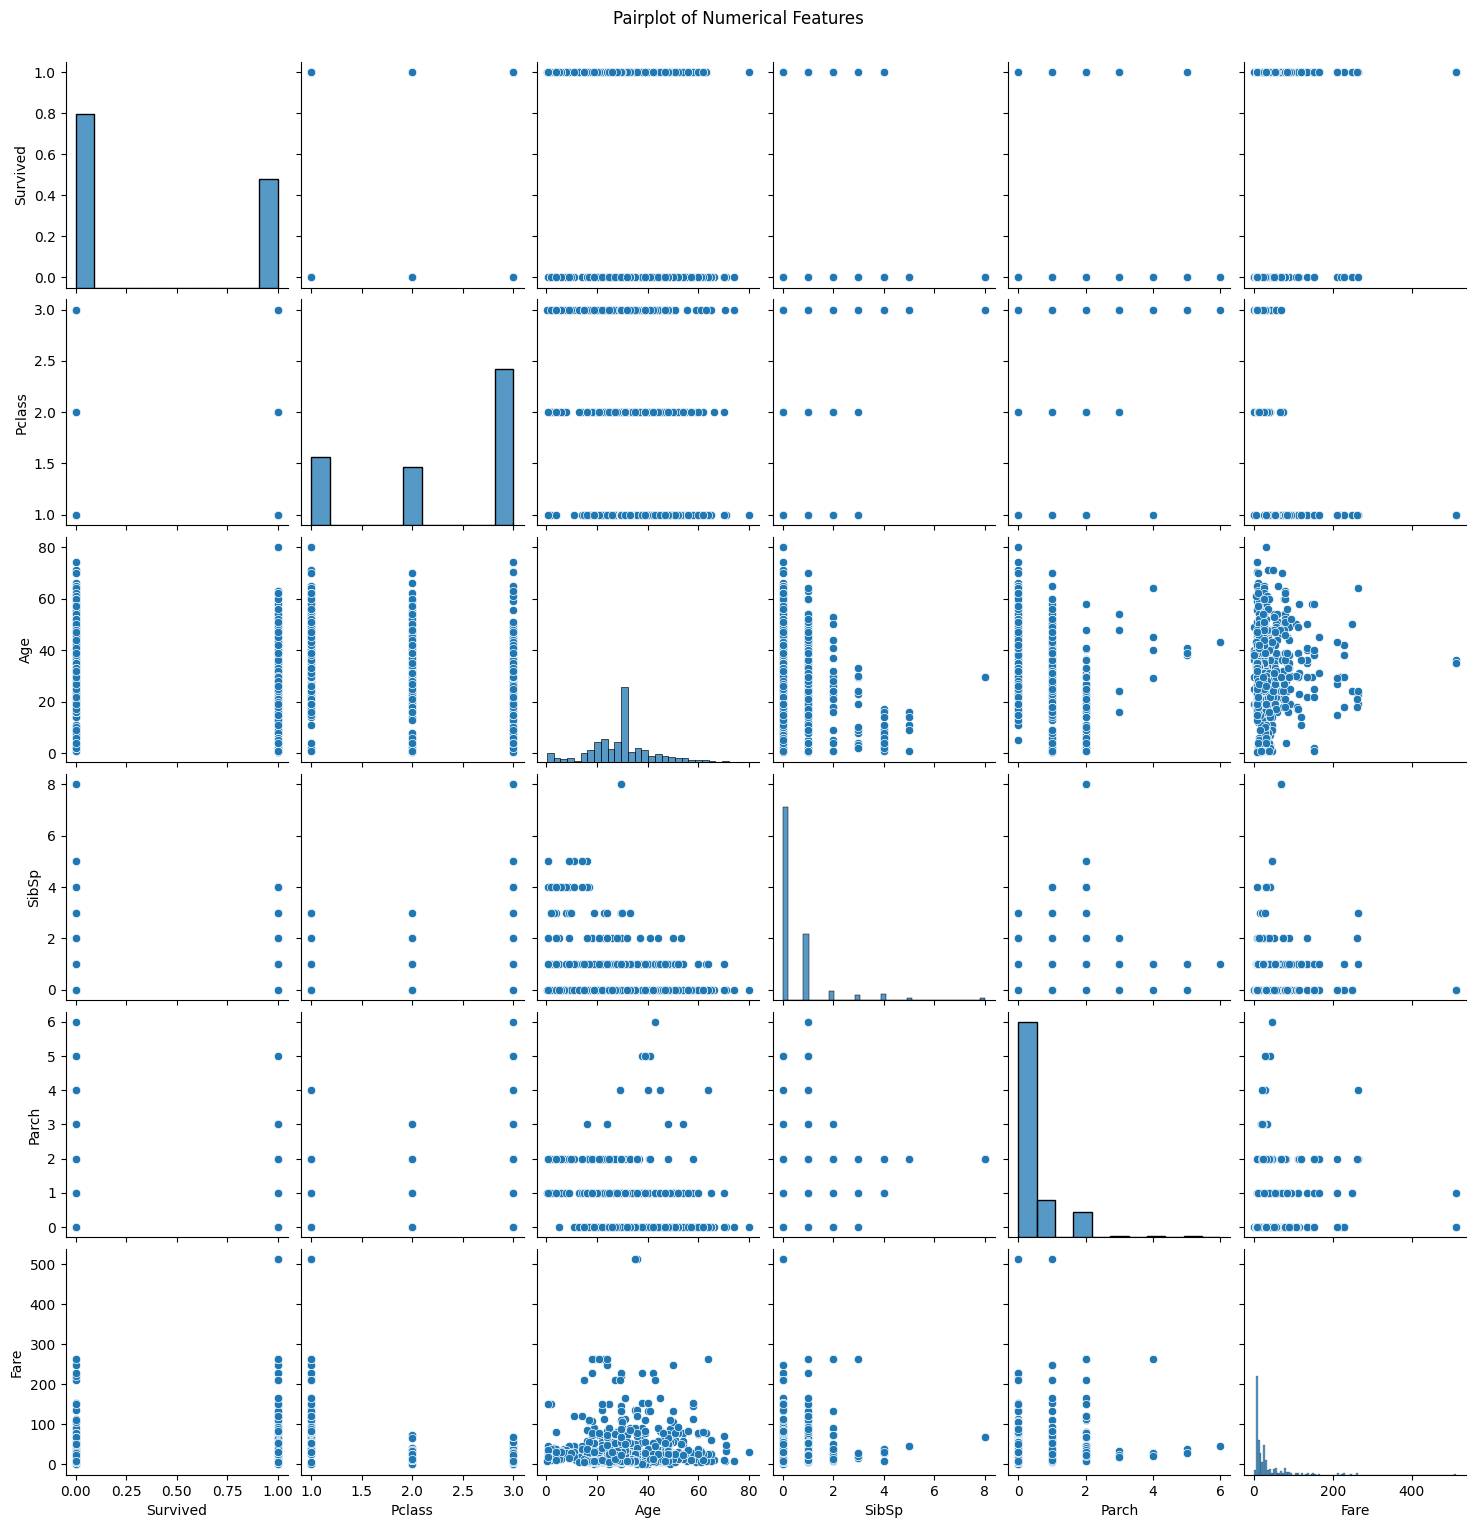

In [27]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(data_clean[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

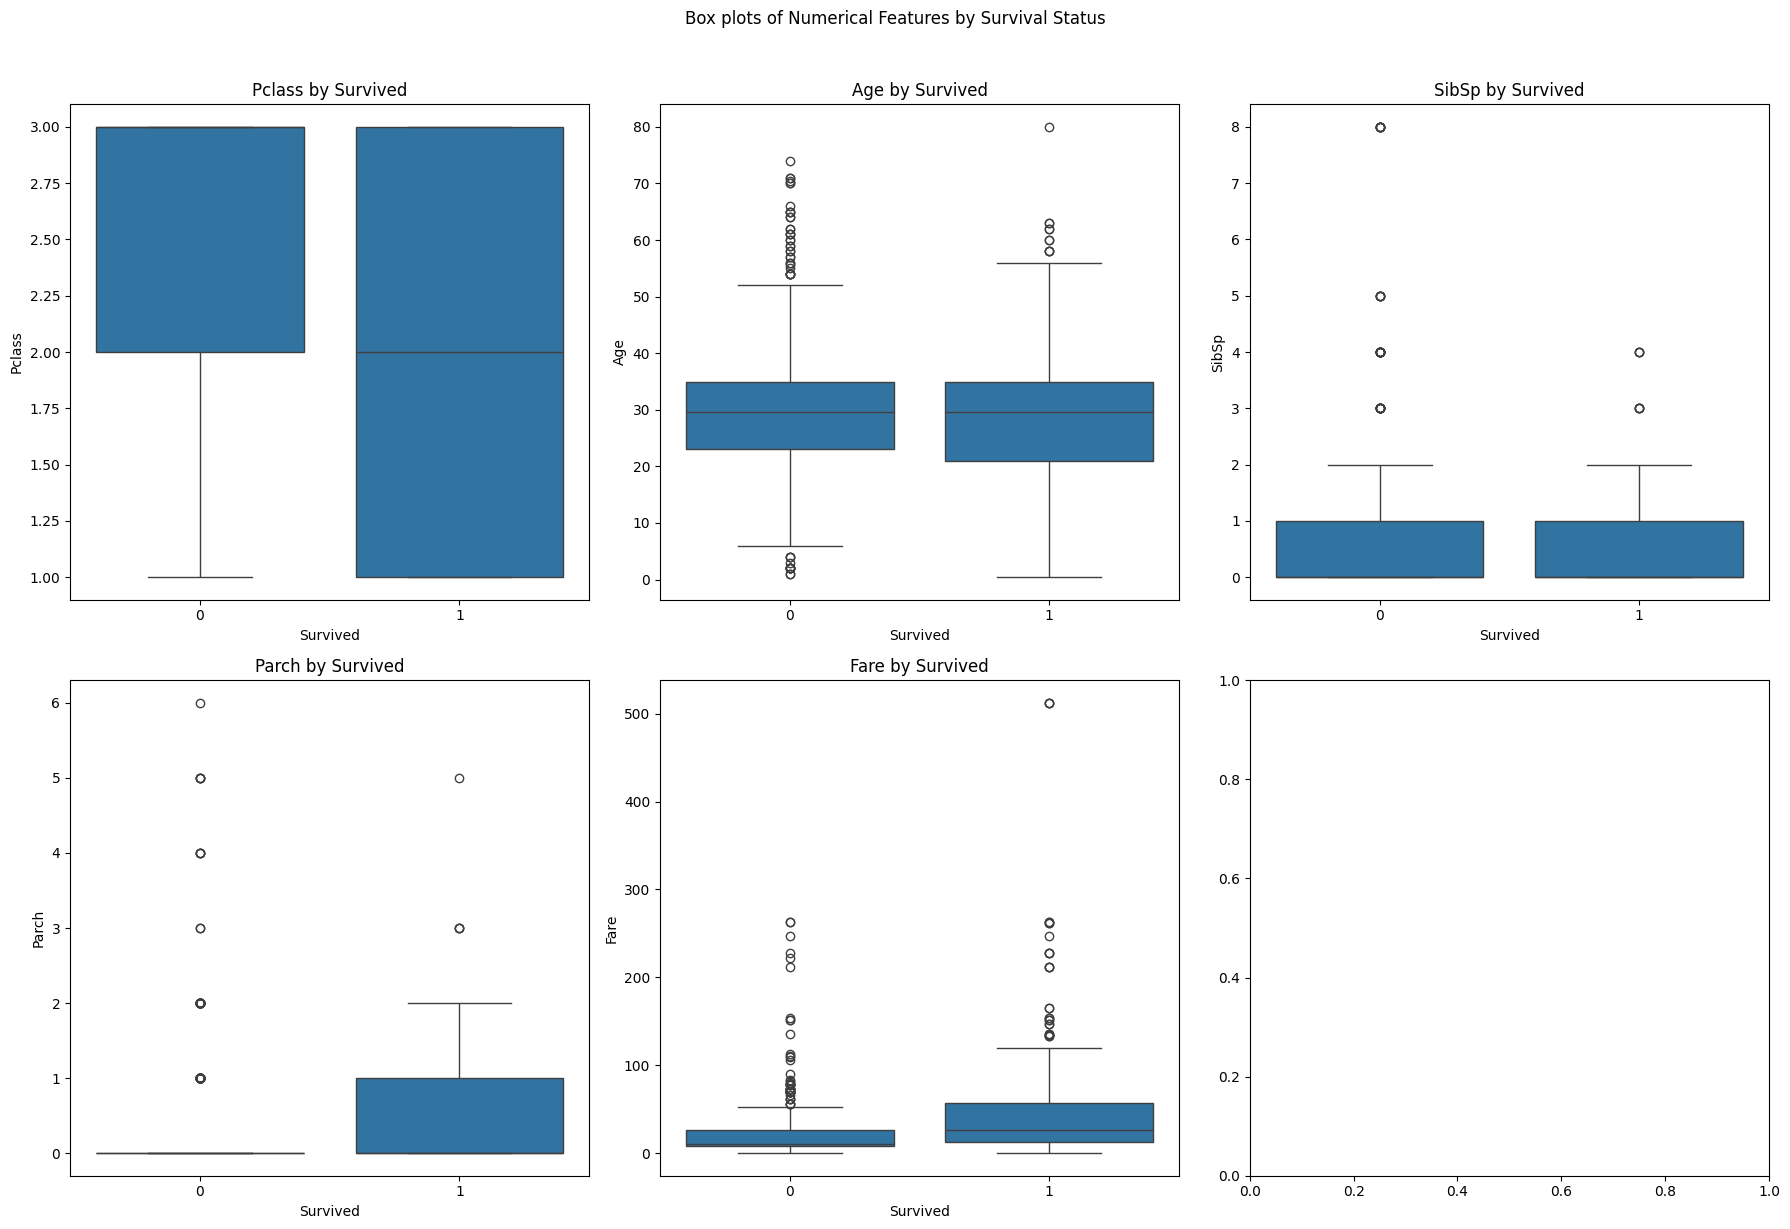

In [28]:
# Box plots to visualize the distribution of numerical features by survival status
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, col in enumerate(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']):
    sns.boxplot(x='Survived', y=col, data=data_clean, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} by Survived')
plt.suptitle('Box plots of Numerical Features by Survival Status', y=1.02)
plt.tight_layout()
plt.show()

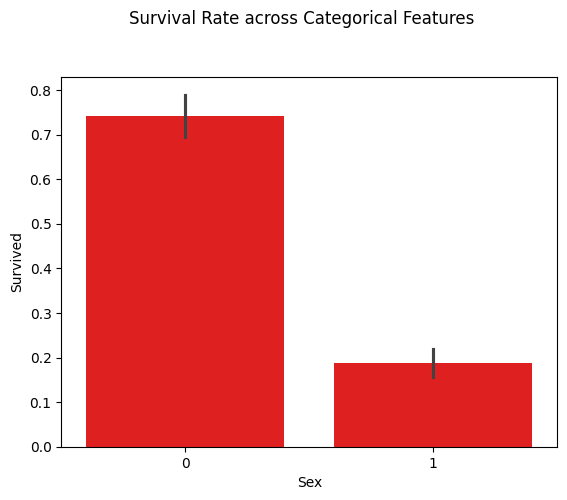

In [29]:
# Bar plots to visualize survival rates across Gender
sns.barplot(x='Sex', y='Survived',color='red', data=data_clean)
plt.suptitle('Survival Rate across Categorical Features', y=1.02)
plt.show()

# Feature Selection

In [30]:
# Separate features (X) and target variable (y)
X = data_clean.drop('Survived', axis=1)
y = data_clean['Survived']

In [31]:
# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier to estimate feature importance
rf_clf.fit(X_imputed, y)

# Extract feature importance scores
feature_importances = rf_clf.feature_importances_

# Select features with importance scores above a certain threshold
selector = SelectFromModel(rf_clf, threshold=0.04)
selector.fit(X_imputed, y)

# Get the indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features_names = X.columns[selected_features_indices]

# Display selected features
print("Selected Features:")
print(selected_features_names)


Selected Features:
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')


In [32]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 5)
Shape of X_test: (179, 5)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [33]:
# Initialize instances of the chosen algorithms with default parameters

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Preprocess features if necessary (e.g., standardization for SVM or KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each model using cross-validation
for name, model in models.items():
    print(f"Training {name}...")

    # Perform grid search for hyperparameter tuning
    if name in ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors']:
        param_grid = {}  # Define hyperparameter grid for each model
        if name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200, 300],
                          'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 5, 10]}
        elif name == 'Gradient Boosting':
            param_grid = {'n_estimators': [100, 200, 300],
                          'learning_rate': [0.01, 0.1, 0.5],
                          'max_depth': [3, 5, 7]}
        elif name == 'Support Vector Machine':
            param_grid = {'C': [0.1, 1, 10],
                          'kernel': ['linear', 'rbf', 'poly']}
        elif name == 'K-Nearest Neighbors':
            param_grid = {'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}
        
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled if name != 'K-Nearest Neighbors' else X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled if name != 'K-Nearest Neighbors' else X_test)
    else:
        model.fit(X_train_scaled if name != 'K-Nearest Neighbors' else X_train, y_train)
        y_pred = model.predict(X_test_scaled if name != 'K-Nearest Neighbors' else X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.2f}")

    # Print classification report and confusion matrix
    print(f"Classification Report of {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix of {name}:")
    print(confusion_matrix(y_test, y_pred))
    print()

Training Logistic Regression...
Accuracy of Logistic Regression: 0.79
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix of Logistic Regression:
[[89 16]
 [21 53]]

Training Decision Tree...
Accuracy of Decision Tree: 0.75
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.72      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179

Confusion Matrix of Decision Tree:
[[82 23]
 [21 53]]

Training Random 

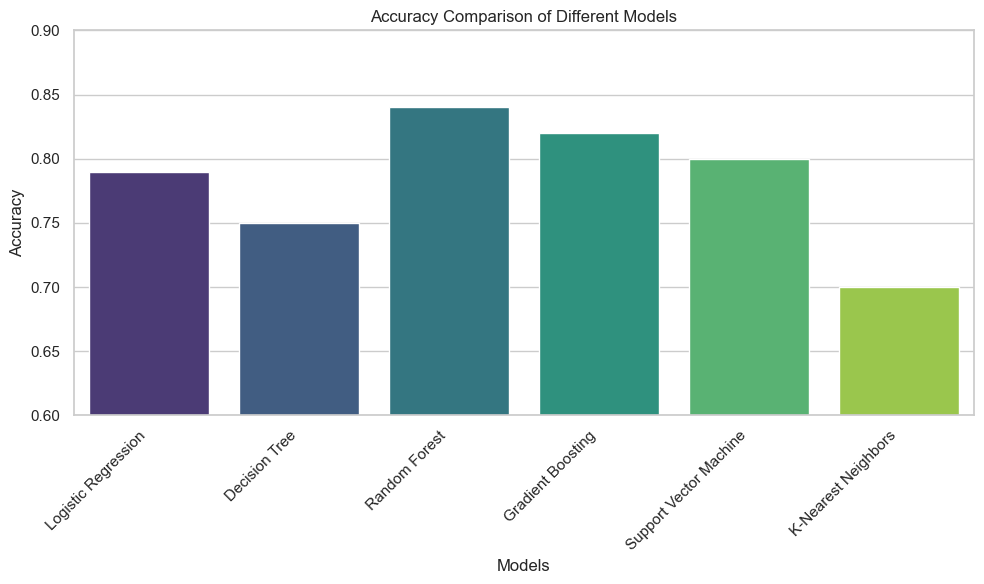

In [34]:
# Define the models and their performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors']
accuracies = [0.79, 0.75, 0.84, 0.82, 0.80, 0.70]

# Create a bar plot to visualize the accuracies of different models
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.9)  # Set the y-axis limit for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

- Based on the accuracy RandomForest is considered the best model here

In [40]:
Rf_clf = RandomForestClassifier(n_estimators=100,min_samples_split = 2, max_depth=3, random_state=42)

# Train the model
Rf_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = Rf_clf.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of RandomForest Classifier:", accuracy_rf)

Accuracy of RandomForest Classifier: 0.776536312849162


In [41]:
# Classification report
print("Classification Report of RandomforestClassifier:")
print(classification_report(y_test, y_pred_rf))

Classification Report of RandomforestClassifier:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       105
           1       0.83      0.58      0.68        74

    accuracy                           0.78       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.79      0.78      0.77       179



In [42]:
# Confusion matrix
print("Confusion Matrix of RandomforestClassifier:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix of RandomforestClassifier:
[[96  9]
 [31 43]]


# HyperParameter Tuning

In [38]:
param_grid = {
    'n_estimators': [50 ,100, 200, 300],
    'max_depth': [10 , 15],
    'min_samples_split': [ 5, 10 , 15]
    }

# Instantiate the RandomForest Classifier
randomforest_classifier = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(randomforest_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Extract the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred_best = best_model.predict(X_test_scaled)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)
print("ROC-AUC:", roc_auc_best)

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 15, 'n_estimators': 300}
Accuracy: 0.8268156424581006
Precision: 0.8412698412698413
Recall: 0.7162162162162162
F1-score: 0.7737226277372263
ROC-AUC: 0.8104890604890604


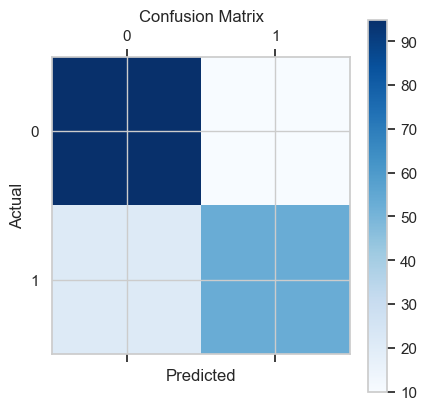

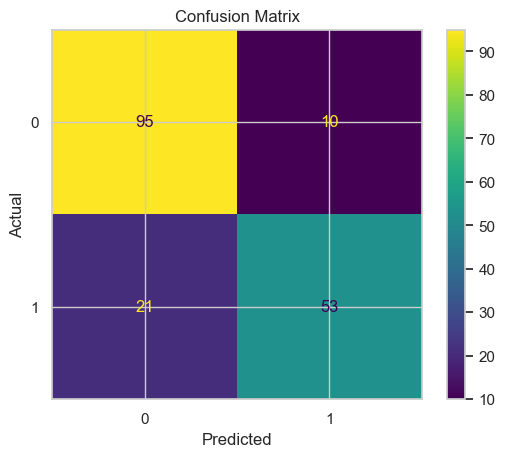

In [39]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.matshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

cm = confusion_matrix(y_test,y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()